## Exploratory Data Analysis
### Thi Quy T. Tran - 2021505

In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("winequality.csv")

In [7]:
df["quality2"] = np.where(df["quality"] > 5, "Good", "Bad")

1. Compute the correlations for each of the pair of attributes available in the dataset. Interpret the statistical findings.

<Axes: >

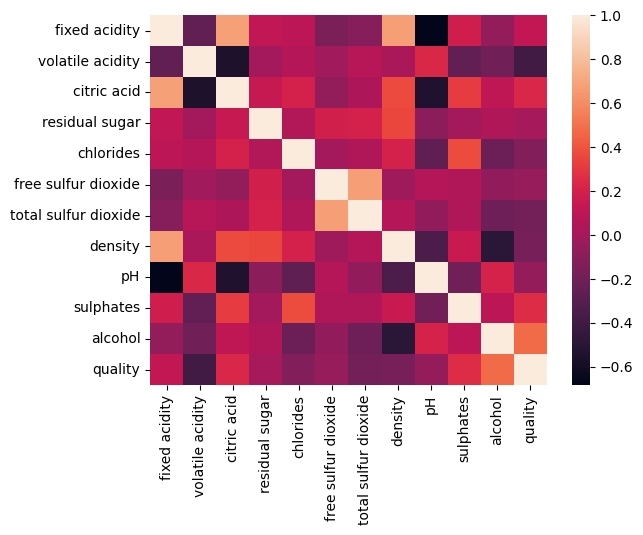

In [24]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr())

- Strong positive correlations between the attributes:
    - Fixed acidity and citric acid
    - Fixed acidity and density
    - Free sulfur dioxide and total sulfur dioxide
- Strong negative correlations between the attributes:
    - Fixed acidity and pH
    - Density and alcohol
    - Citric acid and volatile acidity
    - Citric acid and pH.
- Alcohol shows the strongest positive correlation with quality, while volatile acidity exhibits the strongest negative correlation with quality.

2. Create a scatter plot for the attributes alcohol and pH and interpret the plot.

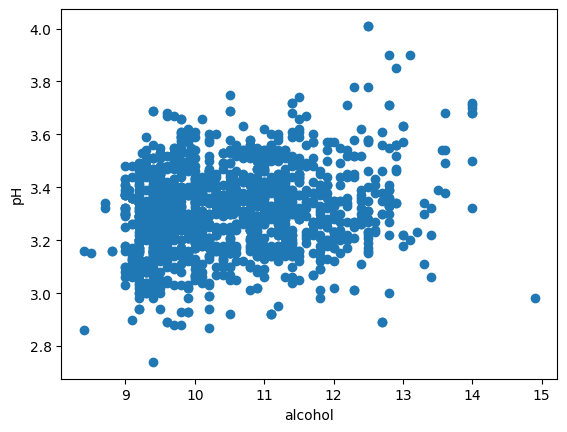

In [10]:
plt.scatter(df['alcohol'],df['pH'])
plt.xlabel('alcohol')
plt.ylabel('pH')
plt.show()

- The scatterplot between alcohol and pH doesn't reveal any clear pattern, indicating a very weak positive correlation. This suggests that the two attributes have little influence on each other.

3. Create a scatter plot for the attributes residual sugar and pH and interpret the plot.

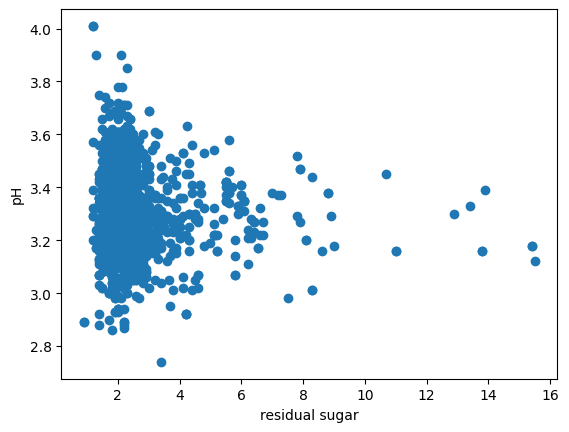

In [11]:
plt.scatter(df['residual sugar'],df['pH'])
plt.xlabel('residual sugar')
plt.ylabel('pH')
plt.show()

- Residual sugar and pH also show a weak negative correlation, indicating they are not strongly related. However, it's evident that most wines have low residual sugar levels, with only a small number exceeding 8.

4. Create a scatter plot for the attributes fixed acidity and citric acid and interpret the plot.

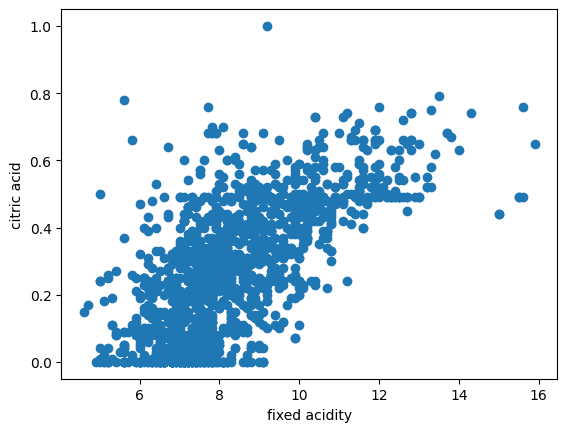

In [12]:
plt.scatter(df['fixed acidity'],df['citric acid'])
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.show()

- Here, we observe a strong positive correlation between fixed acidity and citric acid, indicating that an increase in one of these attributes is likely to result in an increase in the other.

5. Create a histogram of the quality attribute and interpret the resulting histogram.

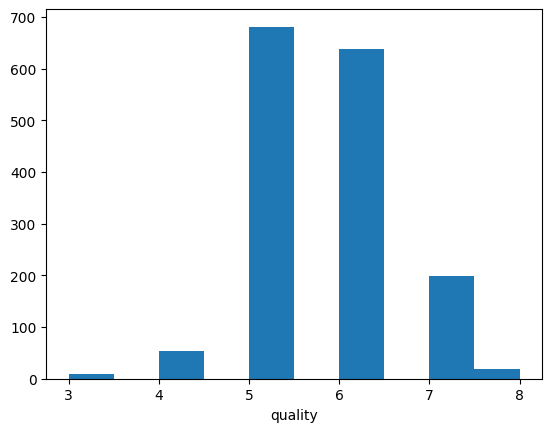

In [13]:
plt.hist(df["quality"])
plt.xlabel("quality")
plt.show()

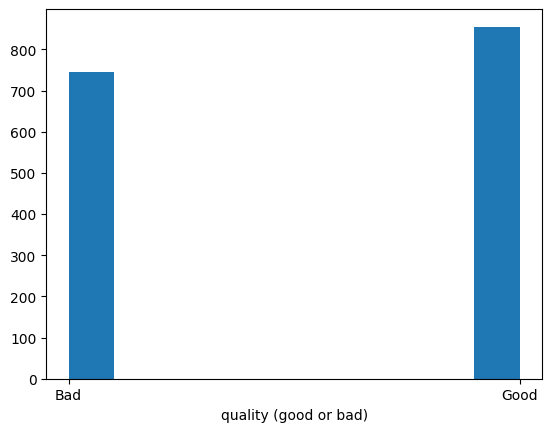

In [14]:
plt.hist(df["quality2"])
plt.xlabel("quality (good or bad)")
plt.show()

- There are approximately 100 more good-quality wines than bad ones (wines with a quality score above 5). The quality score histogram shows a unimodal distribution that's slightly skewed to the right. 
- Most wines fall within the average quality range, with a score of 5 being the most frequent, closely followed by a score of 6. Scores outside this range are much less common, and the data shows no gaps or outliers.

6. Create a box plot for alcohol attribute for the instances of the quality classes (Bad, Good), and all instances in the dataset (three boxes in the same plot). Interpret the resulting box plots.

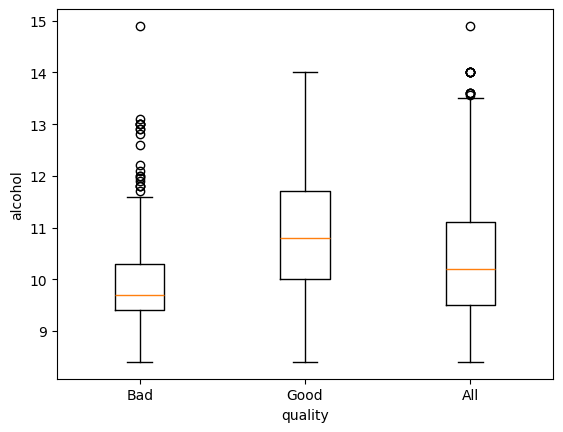

In [15]:
fig, ax = plt.subplots()
ax.boxplot([df[df['quality2']=='Bad']['alcohol'], df[df['quality2']=='Good']['alcohol'], df['alcohol']])
ax.set_xticklabels(["Bad", "Good", "All"])
ax.set_xlabel("quality")
ax.set_ylabel("alcohol")
plt.show()

- When it comes to alcohol percentages, good-quality wines have the highest median, the largest interquartile range (IQR), and the widest overall range. The distribution shows no visible skewness or outliers. In contrast, bad-quality wines have the lowest median, IQR, and range, with a slight upward skew and many larger outliers. This suggests that good-quality wines generally have a higher alcohol percentage.

7. Create a box plot for pH attribute for the instances of the quality classes (Bad, Good), and all instances in the dataset (three boxes in the same plot). Interpret the resulting box plots.

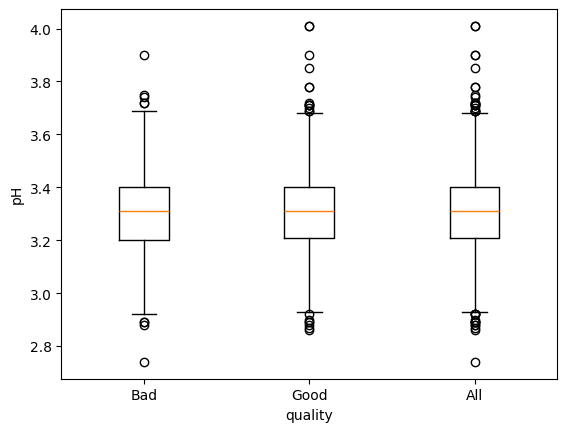

In [16]:
fig, ax = plt.subplots()
ax.boxplot([df[df['quality2']=='Bad']['pH'], df[df['quality2']=='Good']['pH'], df['pH']])
ax.set_xticklabels(["Bad", "Good", "All"])
ax.set_xlabel("quality")
ax.set_ylabel("pH")
plt.show()

- Regarding pH, both good and bad quality wines exhibit similar medians, interquartile ranges (IQRs), and ranges, consistent with the boxplot of all wines. However, there are more outliers present in the good quality wines. Overall, there appears to be little relationship between pH and wine quality.

8. Create supervised scatter plots for the following 3 pairs of attributes using quality as a class variable: alcohol / pH, residual sugar / pH, and fixed acidity / free sulfur dioxide. Use different colors for the class variable. Interpret the obtained plots and address what can be said about the difficulty in predicting the quality and the distribution of the instances of the three classes. Identify the best pair of attributes based on the generated supervised scatter plots.

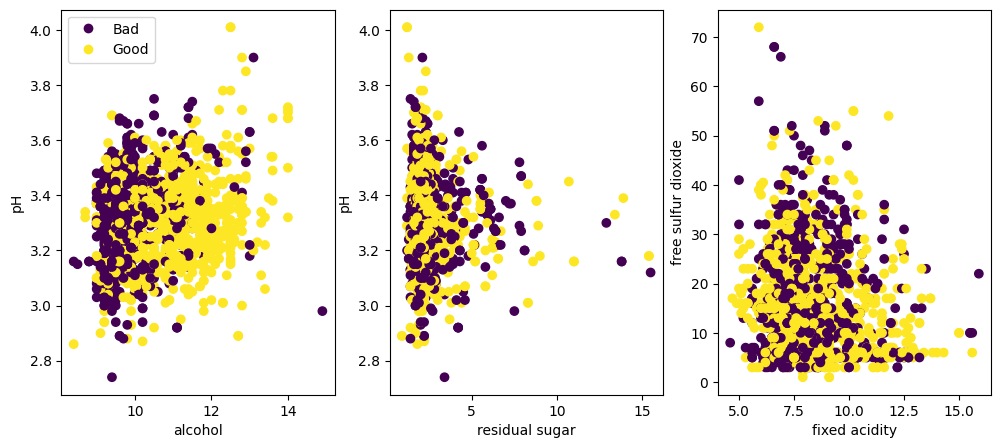

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
color = np.where(df['quality2'] == 'Bad',0,1)
clset = set(zip(color,df['quality2']))

sc = ax[0].scatter(df['alcohol'],df['pH'],c=color)
ax[0].set_xlabel('alcohol')
ax[0].set_ylabel('pH')
handles = [plt.plot([],color=sc.get_cmap()(sc.norm(c)),ls="", marker="o")[0] for c,l in clset ]
labels = [l for c,l in clset]
ax[0].legend(handles, labels)
ax[1].scatter(df['residual sugar'],df['pH'],c=color)
ax[1].set_xlabel('residual sugar')
ax[1].set_ylabel('pH')
ax[2].scatter(df['fixed acidity'],df['free sulfur dioxide'],c=color)
ax[2].set_xlabel('fixed acidity')
ax[2].set_ylabel('free sulfur dioxide')
plt.show()

- The second and third plots show no clear relationship between the attributes, making it difficult to predict wine quality from them. In contrast, the alcohol vs. pH plot reveals a positive correlation between the two attributes. 
- This correlation could be useful for predicting wine quality, as there is a noticeable separation between good and bad wines. If we were to draw a linear line of best fit, bad quality wines would be positioned above the line and good quality wines below it. 
- However, the line would be nearly vertical, indicating that alcohol levels have a significantly stronger impact on quality than pH.

9. Perform PCA on all of the attributes, reduce the dimension to 2 principal components (2D PCA), and create a supervised scatter plot on the 2 principal components. Then normalize all of the attributes with Z-Score and Min-Max normalization, perform 2D PCA on the normalized attributes, and create two supervised scatter plots, one for the 2 principal components of the Z-Score normalized attributes, another for the 2 principal components of the Min-Max normalized attributes. Tell the difference before and after normalization, infer the reason of any difference, tell which normalization method is better and why, interpret how PCA is useful and what are its benefits in this data analysis.

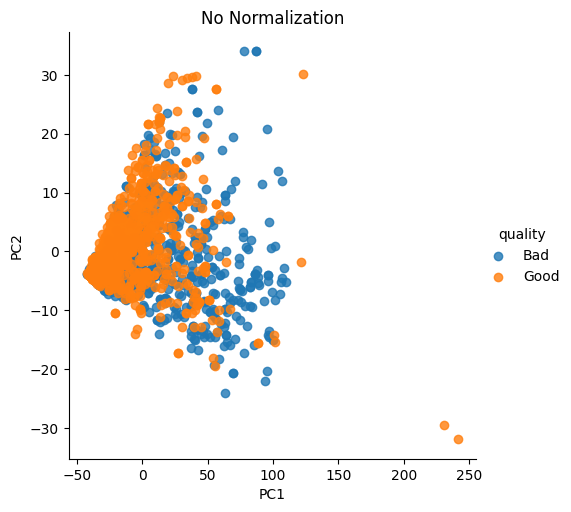

In [18]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(df.drop('quality2',axis=1))

pca_df = pd.DataFrame(data=pca_feat, columns=['PC1','PC2'])
pca_df['quality'] = df['quality2']

sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='quality', fit_reg=False, legend=True)
plt.title('No Normalization')
plt.show()

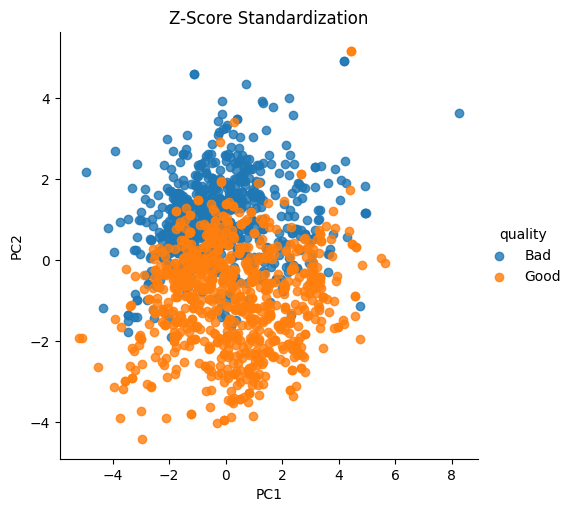

In [19]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
s_scaled_data = standard.fit_transform(df.drop('quality2',axis=1))
pca_feat2 = pca.fit_transform(s_scaled_data)

pca_df2 = pd.DataFrame(data=pca_feat2, columns=['PC1','PC2'])
pca_df2['quality'] = df['quality2']

sns.lmplot(x='PC1', y='PC2', data=pca_df2, hue='quality', fit_reg=False, legend=True)
plt.title('Z-Score Standardization')
plt.show()

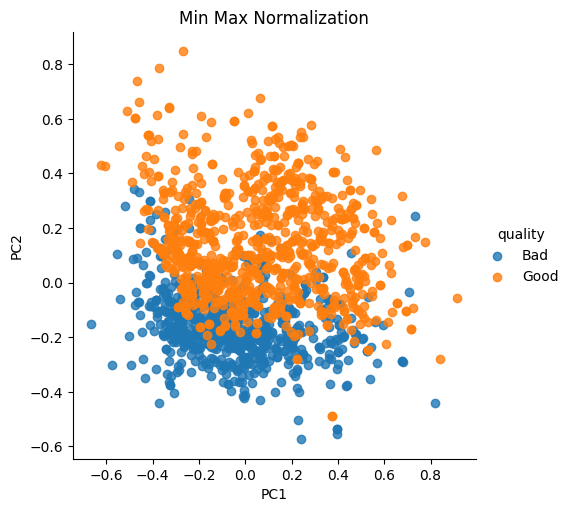

In [20]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
m_scaled_data = mm.fit_transform(df.drop('quality2',axis=1))
pca_feat3 = pca.fit_transform(m_scaled_data)

pca_df3 = pd.DataFrame(data=pca_feat3, columns=['PC1','PC2'])
pca_df3['quality'] = df['quality2']

sns.lmplot(x='PC1', y='PC2', data=pca_df3, hue='quality', fit_reg=False, legend=True)
plt.title('Min Max Normalization')
plt.show()

- Normalization improves the separation of the two classes of wine quality when using PCA compared to not normalizing. This change in shape results from scaling all attribute values to the same range, which reduces overall variation. For instance, alcohol percentage has a much larger range than density. Standardization is particularly beneficial for PCA because it ensures that each attribute contributes equally to the principal components, preventing larger-scale attributes from overshadowing others.
- Some advanages of PCA include dimensionality reduction (reducing the number of attributes), noise reduction (focusing on components that capture the most variance while eliminating less relevant features), and facilitating the visualization of complex relationships in a lower-dimensional plot, which can reveal patterns that are not apparent in the raw data.

10. Write a brief conclusion summarizing the most important findings of this task; in particular, address the findings obtained related to predicting the quality of red wine. If possible, write about which attributes seem useful for predicting wine quality and what you as an individual can learn from this dataset.

- Among all the attributes we analyzed, alcohol percentage emerged as the only factor that had a strong direct impact on wine quality. The correlation heatmap indicated that volatile acidity also has a significant negative correlation with quality, suggesting that higher volatile acidity likely diminishes wine quality. Additionally, the levels of sulfates and citric acid may influence quality, as indicated by the heatmap.
- We also observed interactions between other factors, such as fixed acidity and citric acid levels, which can affect the overall taste of the wine. This dataset can help us identify the most important factors to consider when aiming to achieve a specific taste profile similar to another type of wine.